# Prediction Bot
Heart Disease Prediction
(UCI Dataset)

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [6]:
df= pd.read_csv("Heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isnull().sum()#checking missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
print(df.columns.tolist())

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


In [10]:
df.rename(columns={'HeartDisease': 'target'}, inplace=True)

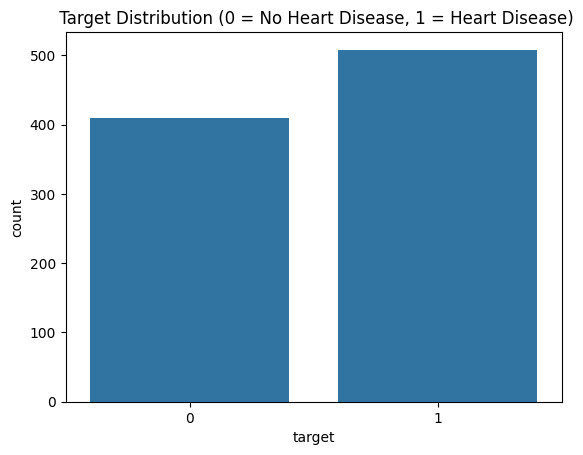

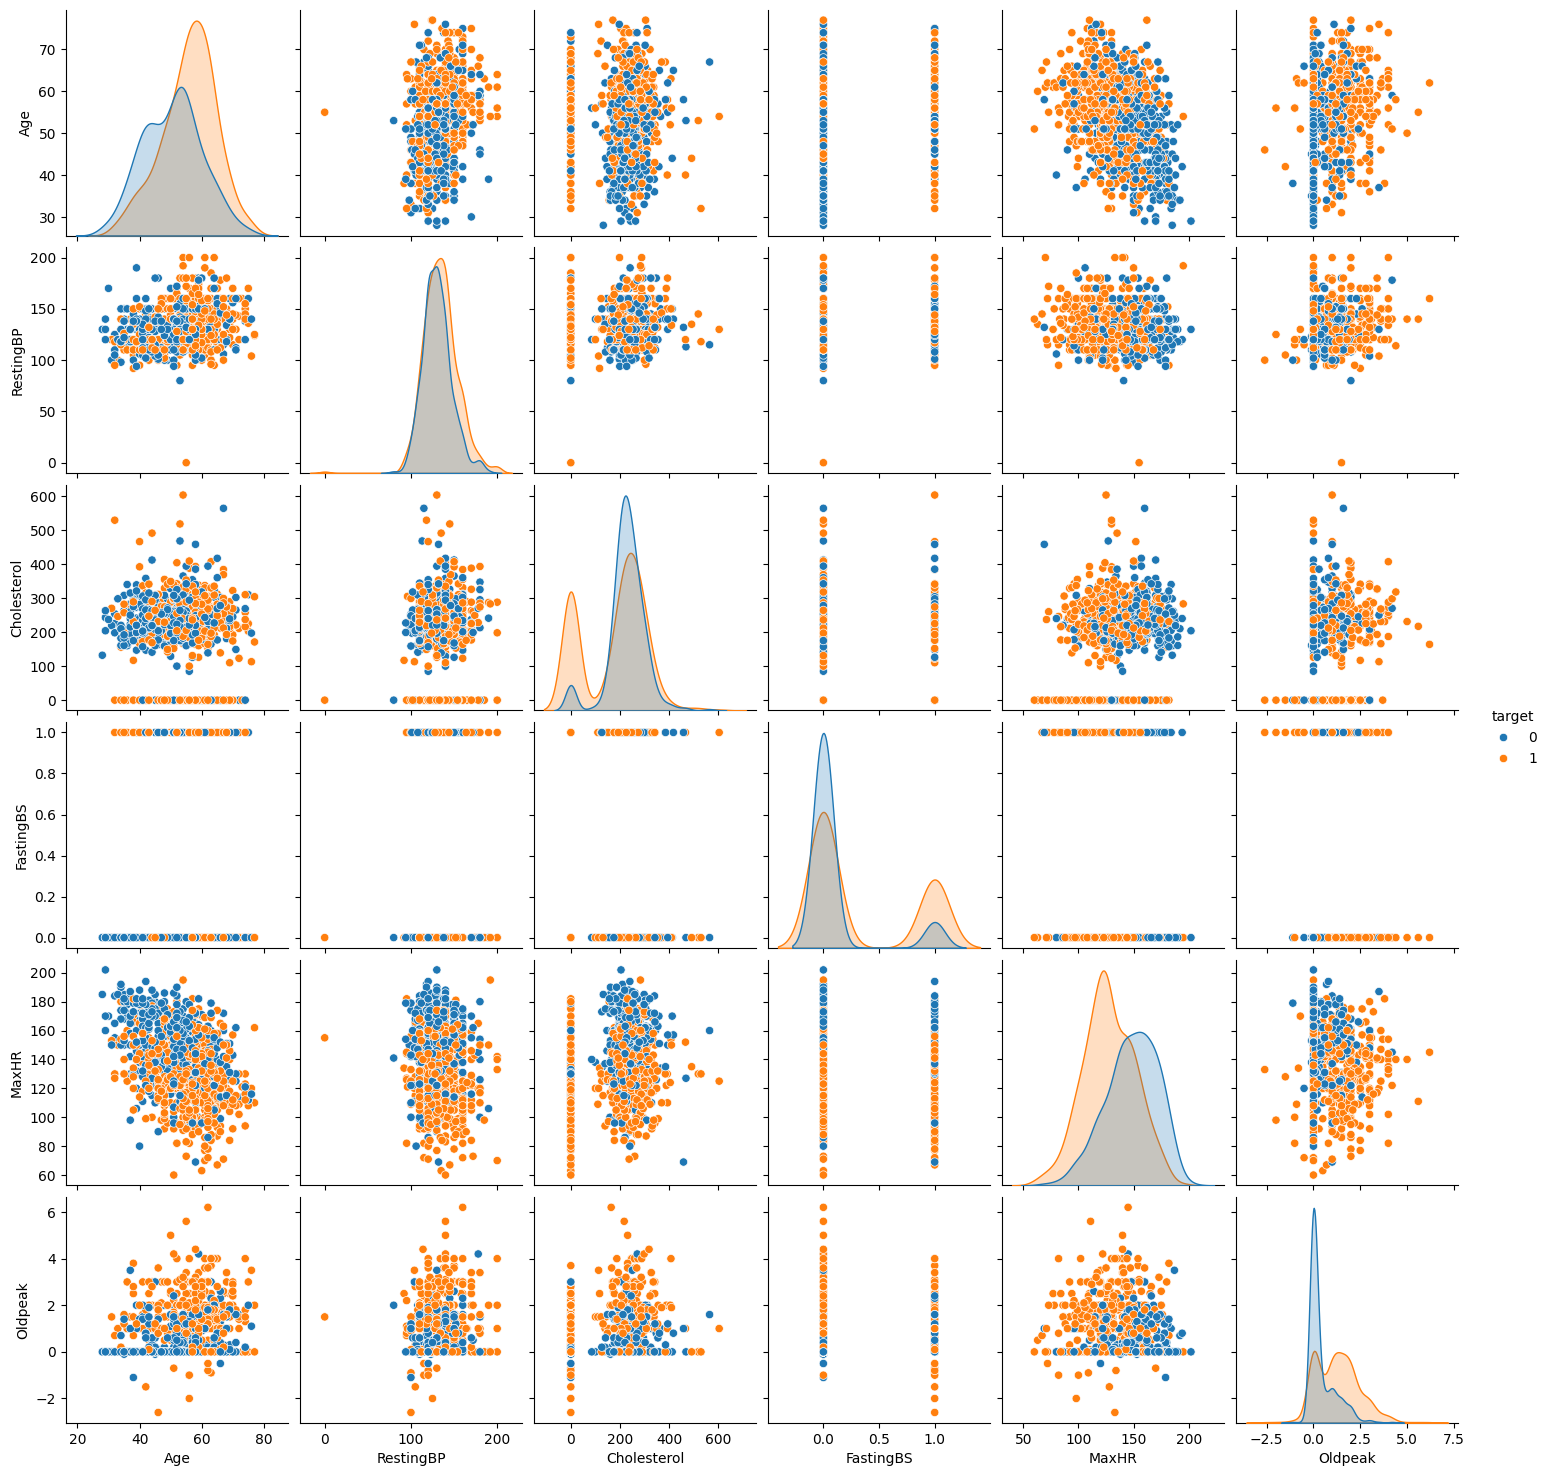

In [11]:
#EDA
sns.countplot(data=df, x="target")
plt.title( " Target Distribution (0 = No Heart Disease, 1 = Heart Disease)")
plt.show()
sns.pairplot(df, hue= "target")
plt.show()

In [12]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
target              int64
dtype: object


In [13]:
df = pd.get_dummies(df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)


In [14]:
X= df.drop("target", axis=1)
y= df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression(max_iter=2000)
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [16]:
#Evaluation
#Accuracy Report
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.8532608695652174
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



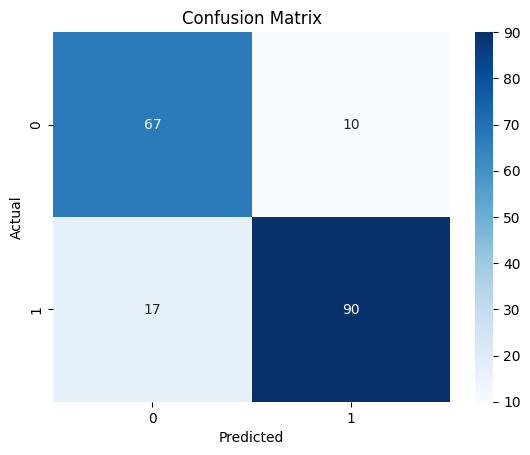

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


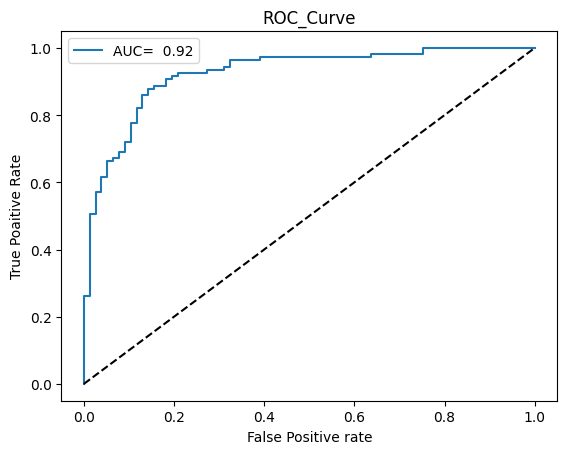

In [23]:
y_probs=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test,y_probs)
plt.plot(fpr, tpr, label=f"AUC= {roc_auc_score(y_test, y_probs): .2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive rate")
plt.ylabel("True Poaitive Rate")
plt.title("ROC_Curve")
plt.legend()
plt.show()

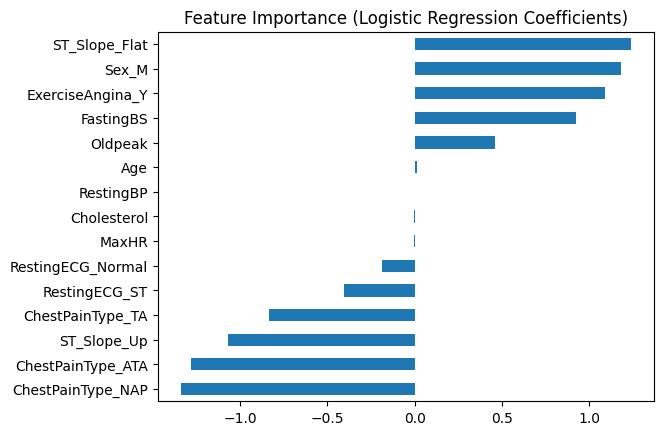

In [24]:
coeffs = pd.Series(model.coef_[0], index=X.columns)
coeffs.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()
